In [2]:
import pandas as pd

df1 = pd.read_csv('calls.csv')
df2 = pd.read_csv('customers.csv')
df3 = pd.read_csv('reason.csv')
df4 = pd.read_csv('sentiment_statisticscc.csv')
df5 = pd.read_csv('test.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


# Univariate Analysis

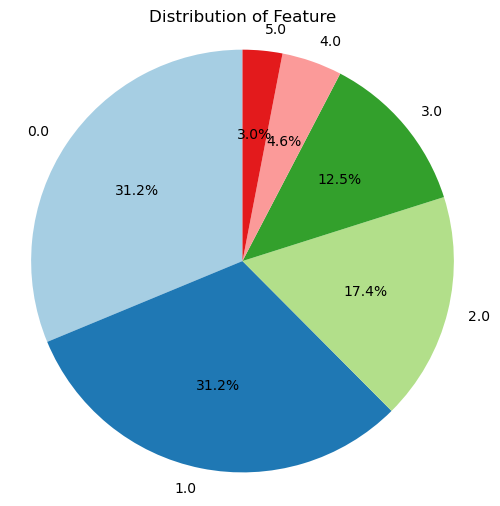

In [7]:
import matplotlib.pyplot as plt

feature_counts = df2['elite_level_code'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Feature')
plt.axis('equal') 
plt.show()

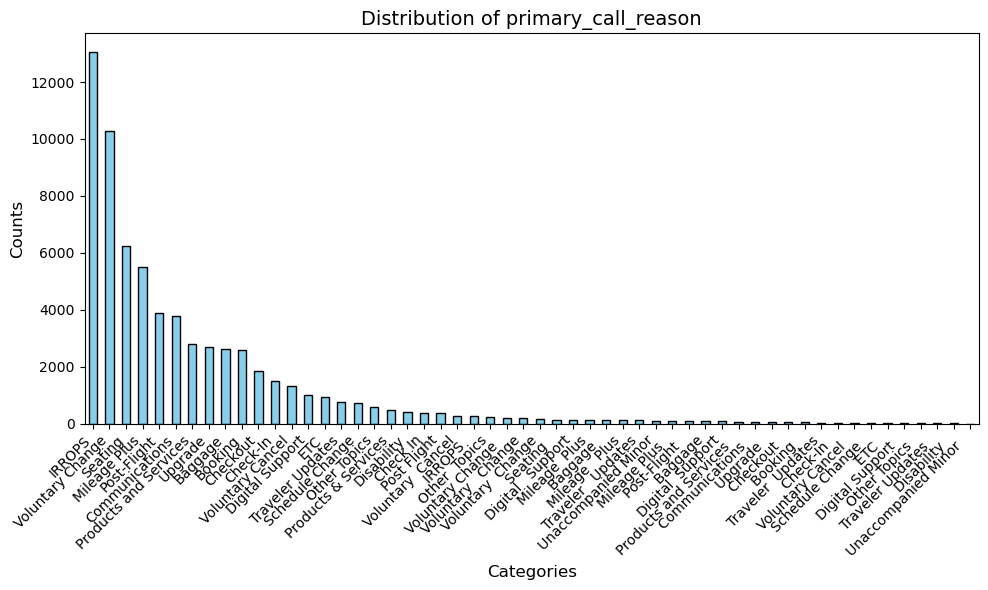

In [8]:
feature_column = 'primary_call_reason'  
category_counts = df3[feature_column].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title(f'Distribution of {feature_column}', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


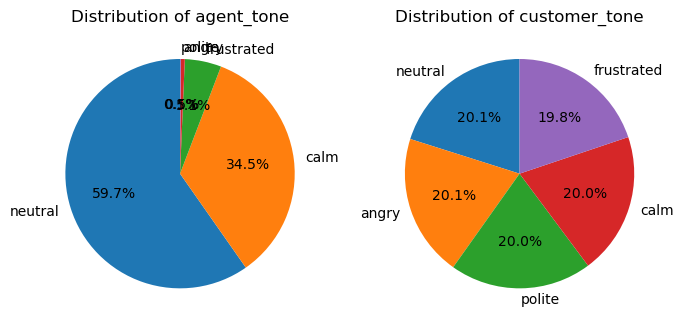

In [9]:
features = ['agent_tone', 'customer_tone']
fig, axs = plt.subplots(1, 2, figsize=(7, 7))

for ax, feature in zip(axs, features):
    counts = df4[feature].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


# Feature Engineering

In [50]:
df1['call_start_datetime'] = pd.to_datetime(df1['call_start_datetime'])
df1['call_end_datetime'] = pd.to_datetime(df1['call_end_datetime'])
df1['agent_assigned_datetime'] = pd.to_datetime(df1['agent_assigned_datetime'])
df1['handle_time'] = (df1['call_end_datetime'] - df1['call_start_datetime']).dt.total_seconds()

df1['waiting_time'] = (df1['agent_assigned_datetime'] - df1['call_start_datetime']).dt.total_seconds()

total_calls = len(df1)

total_handle_time = df1['handle_time'].sum()
AHT = total_handle_time / total_calls
print(f"Average Handle Time (AHT): {AHT:.6f} seconds")
print(f"Average Handle Time (AHT): {AHT/60:.2f} minutes")

total_waiting_time = df1['waiting_time'].sum()
AST = total_waiting_time / total_calls
print(f"Average Speed to Answer (AST): {AST:.6f} seconds")
print(f"Average Speed to Answer (AST): {AST/60:.2f} minutes")

Average Handle Time (AHT): 1134.116140 seconds
Average Handle Time (AHT): 18.90 minutes
Average Speed to Answer (AST): 437.067539 seconds
Average Speed to Answer (AST): 7.28 minutes


In [51]:
merged_df = pd.merge(df1, df3, on='call_id', how='left')

merged_df = pd.merge(merged_df, df4, on='call_id', how='left')

merged_df = pd.merge(merged_df, df2, on='customer_id', how='left')

In [52]:
aht_by_reason = merged_df.groupby('call_reason')['handle_time'].mean()
print(aht_by_reason)


call_reason
Baggage                   875.741525
Booking                   667.963595
Check In                  929.968487
Checkout                 1741.557203
Communications           1066.687500
Digital Support           878.008163
Disability                795.632754
ETC                      1507.184874
IRROPS                   1145.197205
Mileage Plus             1356.588617
Other Topics              588.850856
Post Flight              1502.327945
Products & Services      1017.983193
Products and Services    1054.180672
Schedule Change           730.834473
Seating                  1045.819324
Traveler Updates         1083.265742
Unaccompanied Minor      1207.500000
Upgrade                   930.832725
Voluntary Cancel         1261.381456
Voluntary Change         1179.640487
Name: handle_time, dtype: float64


In [53]:
ast_by_loyalty = merged_df.groupby('elite_level_code')['waiting_time'].mean()
print(ast_by_loyalty)


elite_level_code
0.0    438.579273
1.0    436.918580
2.0    432.772795
3.0    429.341004
4.0    413.308235
5.0    411.410165
Name: waiting_time, dtype: float64


In [54]:
most_frequent_reason = merged_df['call_reason'].value_counts().idxmax()
least_frequent_reason = merged_df['call_reason'].value_counts().idxmin()
print(f"Least frequent reason: {least_frequent_reason}")
print(f"Most frequent reason: {most_frequent_reason}")

aht_most_frequent = merged_df[merged_df['call_reason'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = merged_df[merged_df['call_reason'] == least_frequent_reason]['handle_time'].mean()

percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100
print(f"Percentage difference between most and least frequent call reasons: {percentage_difference:.2f}%")


Least frequent reason: Unaccompanied Minor
Most frequent reason: IRROPS
Percentage difference between most and least frequent call reasons: -5.16%


In [33]:
ast_by_agent_tone = merged_df.groupby('agent_tone')['waiting_time'].mean()
print(ast_by_agent_tone)

agent_tone
angry         425.089974
calm          443.528267
frustrated    424.397394
neutral       434.443613
polite        461.379310
Name: waiting_time, dtype: float64


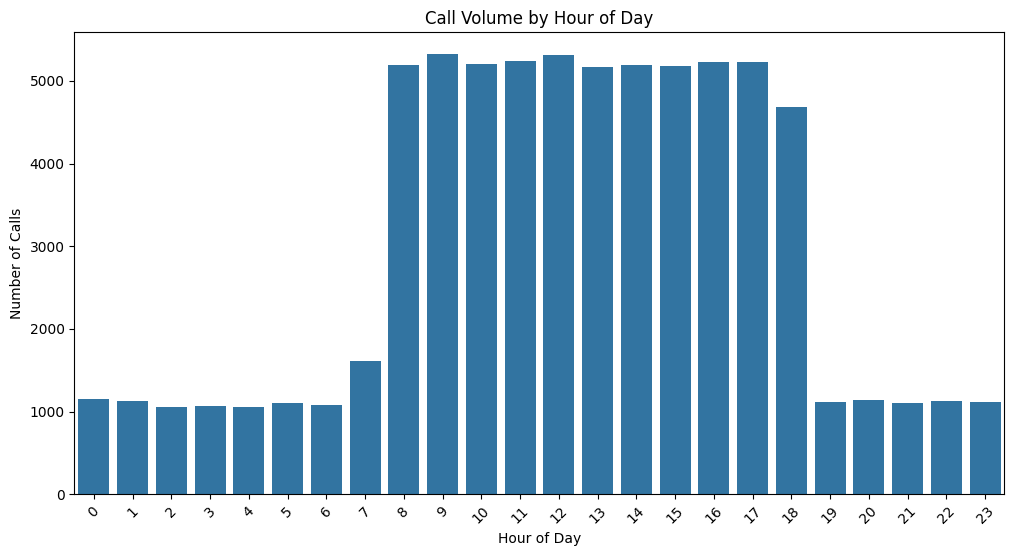

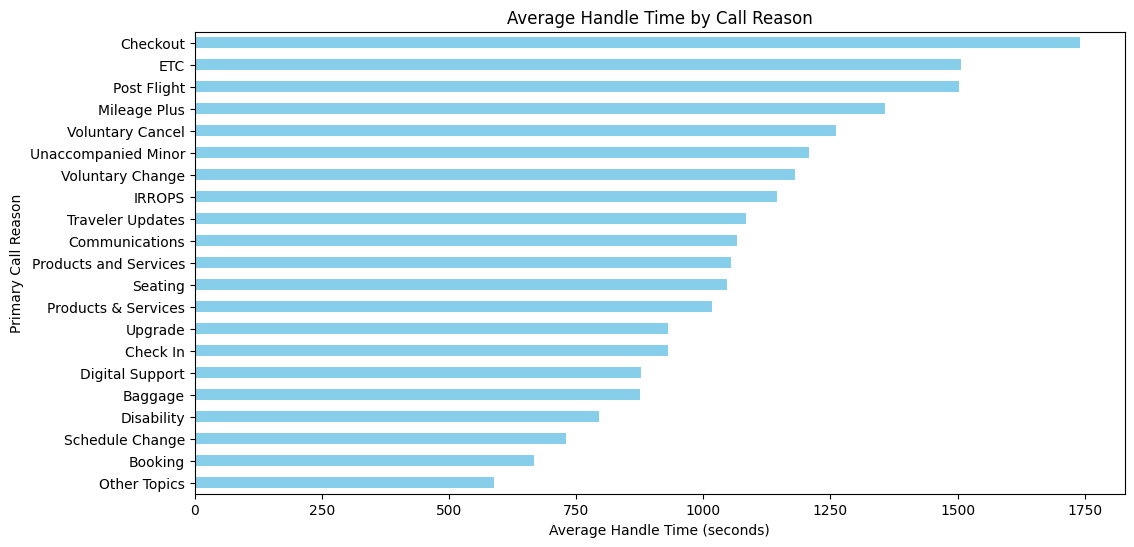

Least Frequent Call Reason: Unaccompanied Minor - AHT: 1207.50 seconds
Most Frequent Call Reason: IRROPS - AHT: 1145.20 seconds
Percentage Difference between Most and Least Frequent Call Reasons: -5.16%


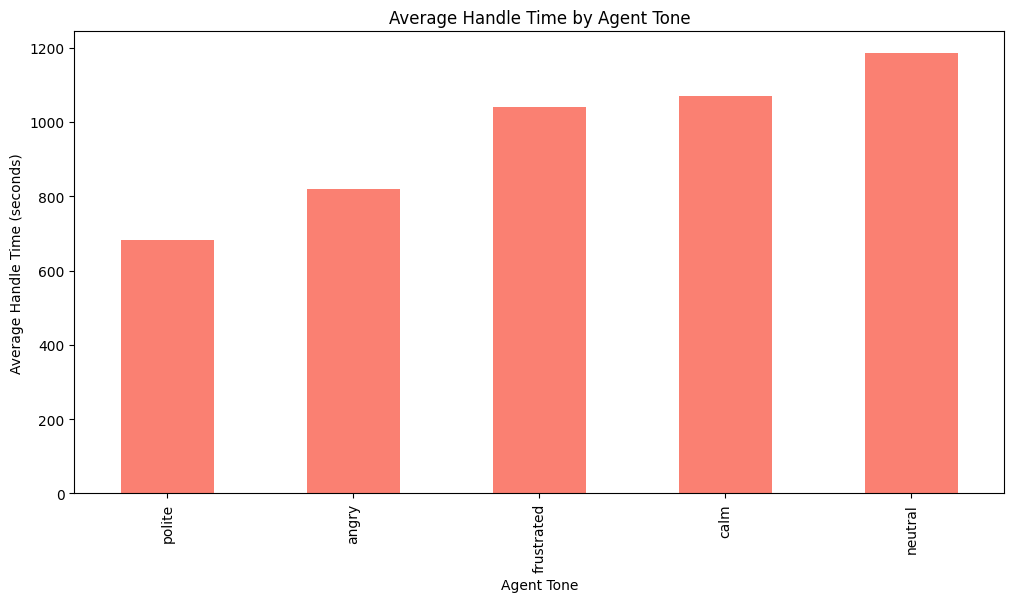

In [55]:
import numpy as np
import seaborn as sns

df1['call_hour'] = df1['call_start_datetime'].dt.hour
call_volume_by_hour = df1['call_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=call_volume_by_hour.index, y=call_volume_by_hour.values)
plt.title('Call Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

average_aht_by_reason = merged_df.groupby('call_reason')['handle_time'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_aht_by_reason.plot(kind='barh', color='skyblue')
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')
plt.show()

call_reason_counts = merged_df['call_reason'].value_counts()
least_frequent_reason = call_reason_counts.idxmin()
most_frequent_reason = call_reason_counts.idxmax()

aht_most_frequent = average_aht_by_reason[most_frequent_reason]
aht_least_frequent = average_aht_by_reason[least_frequent_reason]
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f"Least Frequent Call Reason: {least_frequent_reason} - AHT: {aht_least_frequent:.2f} seconds")
print(f"Most Frequent Call Reason: {most_frequent_reason} - AHT: {aht_most_frequent:.2f} seconds")
print(f"Percentage Difference between Most and Least Frequent Call Reasons: {percentage_difference:.2f}%")

average_aht_by_agent_tone = merged_df.groupby('agent_tone')['handle_time'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_aht_by_agent_tone.plot(kind='bar', color='salmon')
plt.title('Average Handle Time by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.show()
